# 🧠 Parkinson's Disease Telemonitoring Prediction


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:

df = pd.read_csv('Parkinsons.csv')
df.head()

,subject,age,sex,test_time,motor_updrs,total_updrs,jitter,jitter_abs,jitter_rap,jitter_ppq5,...,shimmer_db,shimmer_apq3,shimmer_apq5,shimmer_apq11,shimmer_dda,nhr,hnr,rpde,dfa,ppe
0,1,72,False,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,False,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,False,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,False,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,False,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [ ]:

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject        5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   bool   
 3   test_time      5875 non-null   float64
 4   motor_updrs    5875 non-null   float64
 5   total_updrs    5875 non-null   float64
 6   jitter         5875 non-null   float64
 7   jitter_abs     5875 non-null   float64
 8   jitter_rap     5875 non-null   float64
 9   jitter_ppq5    5875 non-null   float64
 10  jitter_ddp     5875 non-null   float64
 11  shimmer        5875 non-null   float64
 12  shimmer_db     5875 non-null   float64
 13  shimmer_apq3   5875 non-null   float64
 14  shimmer_apq5   5875 non-null   float64
 15  shimmer_apq11  5875 non-null   float64
 16  shimmer_dda    5875 non-null   float64
 17  nhr            5875 non-null   float64
 18  hnr     

,subject,age,test_time,motor_updrs,total_updrs,jitter,jitter_abs,jitter_rap,jitter_ppq5,jitter_ddp,...,shimmer_db,shimmer_apq3,shimmer_apq5,shimmer_apq11,shimmer_dda,nhr,hnr,rpde,dfa,ppe
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,0.008962,...,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,12.372279,8.821524,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,0.009371,...,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,1.000000,36.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,0.000980,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,0.004730,...,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,22.000000,65.000000,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,0.006750,...,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,33.000000,72.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,0.009870,...,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,42.000000,85.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,0.172630,...,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


In [ ]:

X = df.drop(columns=['subject', 'test_time', 'motor_updrs', 'total_updrs'])
y = df['total_updrs']


X['sex'] = X['sex'].astype(int)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

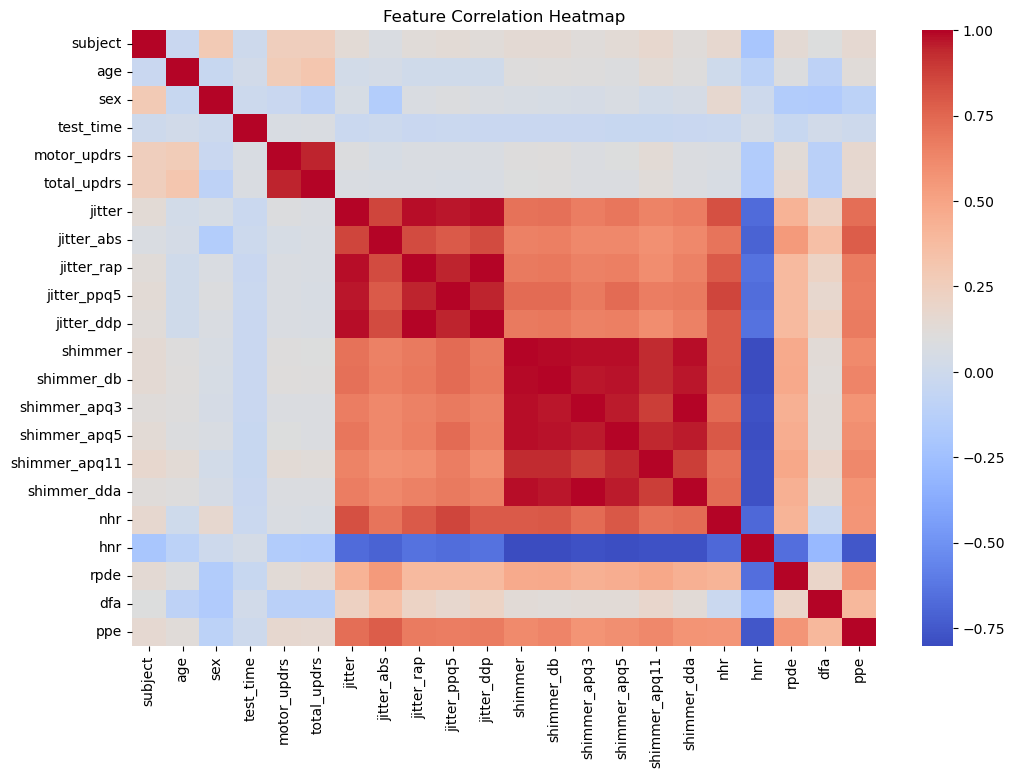

In [ ]:

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("🔍 Random Forest Regressor")
print("R² Score:", r2_score(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))

🔍 Random Forest Regressor
R² Score: 0.9202673257199792
MAE: 2.1489778178723404
RMSE: 2.9724434879548354


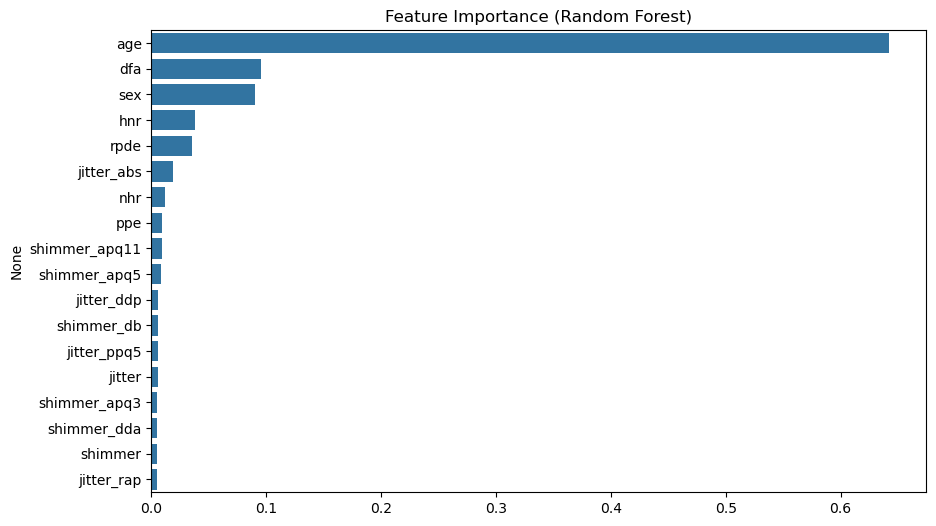

In [ ]:

importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=importances.values, y=importances.index)
plt.title("Feature Importance (Random Forest)")
plt.show()

In [ ]:

def predict_updrs(age, sex, jitter, shimmer, hnr, rpde, dfa, ppe):

    input_data = pd.DataFrame([{
        'age': age,
        'sex': int(sex),
        'jitter': jitter,
        'shimmer': shimmer,
        'hnr': hnr,
        'rpde': rpde,
        'dfa': dfa,
        'ppe': ppe,
        
        **{col: X[col].mean() for col in X.columns if col not in ['age', 'sex', 'jitter', 'shimmer', 'hnr', 'rpde', 'dfa', 'ppe']}
    }])[X.columns]

    prediction = rf_model.predict(input_data)[0]
    print(f"📣 Predicted Total UPDRS Score: {prediction:.2f}")


predict_updrs(age=65, sex=True, jitter=0.0045, shimmer=0.021, hnr=24, rpde=0.45, dfa=0.56, ppe=0.19)

📣 Predicted Total UPDRS Score: 11.90
